In [37]:
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

plt.rcParams['font.family'] = 'SimHei'

# ref_symbol = pd.read_csv('stock_us_hist_df.csv')
# stocks = ['105.MSFT','105.GOOGL','105.AAPL','105.META','105.AMZN','106.BRK_B','106.JNJ','106.JPM','105.NVDA','105.TSLA']
stocks = ['105.MSFT','105.GOOGL','105.AAPL','105.META','105.AMZN','105.NVDA','105.TSLA']

In [38]:
# 存储所有股票数据的列表
all_dfs = []

# 循环获取每个股票的历史数据
for code in stocks:
    try:
        # 调用接口获取数据
        df = ak.stock_us_hist(
            symbol=code,
            period="daily",
            start_date="20200101",
            end_date="20241231",
            adjust="qfq"
        )
        # 添加股票代码列用于标识
        df["股票代码"] = code  
        all_dfs.append(df)
        print(f"已获取 {code} 数据，共 {len(df)} 行")
    except Exception as e:
        print(f"获取 {code} 失败，错误信息: {str(e)}")

# 合并所有数据（如果存在有效数据）
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    print("\n合并后的数据表:")
    print(combined_df)
else:
    print("未获取到任何数据")

已获取 105.MSFT 数据，共 1258 行
已获取 105.GOOGL 数据，共 1258 行
已获取 105.AAPL 数据，共 1258 行
已获取 105.META 数据，共 1258 行
已获取 105.AMZN 数据，共 1258 行
已获取 105.NVDA 数据，共 1258 行
已获取 105.TSLA 数据，共 1258 行

合并后的数据表:
              日期      开盘      收盘      最高      最低       成交量           成交额  \
0     2020-01-02  145.15  146.99  147.10  144.70  22634546  3.615510e+09   
1     2020-01-03  144.69  144.99  146.31  144.43  21121681  3.362709e+09   
2     2020-01-06  143.45  145.40  145.47  142.88  20826702  3.299661e+09   
3     2020-01-07  145.69  143.95  146.04  143.69  21881740  3.464530e+09   
4     2020-01-08  145.30  146.46  147.17  144.32  27762026  4.432835e+09   
...          ...     ...     ...     ...     ...       ...           ...   
8801  2024-12-24  435.90  462.28  462.78  435.14  59551750  2.689724e+10   
8802  2024-12-26  465.16  454.13  465.33  451.02  76651210  3.499208e+10   
8803  2024-12-27  449.52  431.66  450.00  426.50  82666821  3.592304e+10   
8804  2024-12-30  419.40  417.41  427.00  415.75  6494

In [39]:
combined_df["日期"] = pd.to_datetime(combined_df["日期"])
# 分割训练集（2020-2023年）
train_df = combined_df[combined_df["日期"].dt.year <= 2023]

# 分割样本外测试集（2024年）
test_df = combined_df[combined_df["日期"].dt.year == 2024]

C:\Users\hp\AppData\Local\Temp\ipykernel_7528\949397379.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  full_df["20日价量相关性"] = full_df.groupby("股票代码").apply(
C:\Users\hp\AppData\Local\Temp\ipykernel_7528\949397379.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  full_df["14日RSI"] = full_df.groupby("股票代码").apply(
C:\Users\hp\AppData\Local\Temp\ipykernel_7528\949397379.py:174: DeprecationWarning: Data

训练集因子绩效:
5日收益率: IC=-0.0042, IR=-0.0097
振幅偏离度: IC=-0.0014, IR=-0.0033
20日价量相关性: IC=-0.0092, IR=-0.0217
换手率5日变化率: IC=0.0148, IR=0.0343
MACD信号线: IC=0.0035, IR=0.0085


C:\Users\hp\AppData\Local\Temp\ipykernel_7528\949397379.py:209: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  ic, _ = spearmanr(valid_data[factor_name], valid_data["次日收益率"])


量价齐升信号: IC=-0.0093, IR=-0.0213
布林带宽度: IC=-0.0111, IR=-0.0248

测试集因子绩效:
5日收益率: IC=-0.0041, IR=-0.0099
振幅偏离度: IC=0.0098, IR=0.0240
20日价量相关性: IC=-0.0582, IR=-0.1357
换手率5日变化率: IC=0.0183, IR=0.0422
MACD信号线: IC=0.0006, IR=0.0013
量价齐升信号: IC=0.0539, IR=0.1218
布林带宽度: IC=0.0132, IR=0.0295

综合因子绩效:
训练集: IC=-0.0035, IR=-0.0079
测试集: IC=0.0073, IR=0.0156


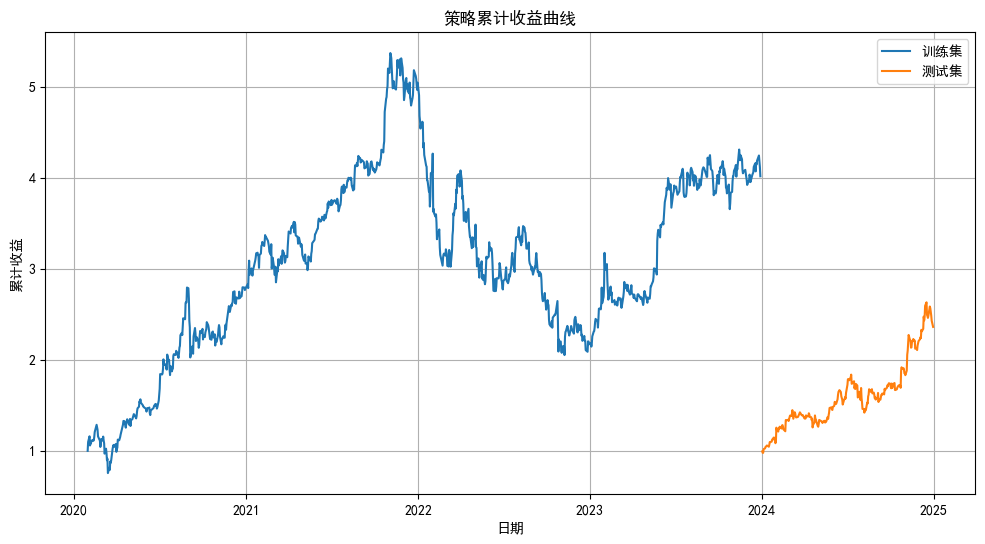

d:\anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.draw()
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


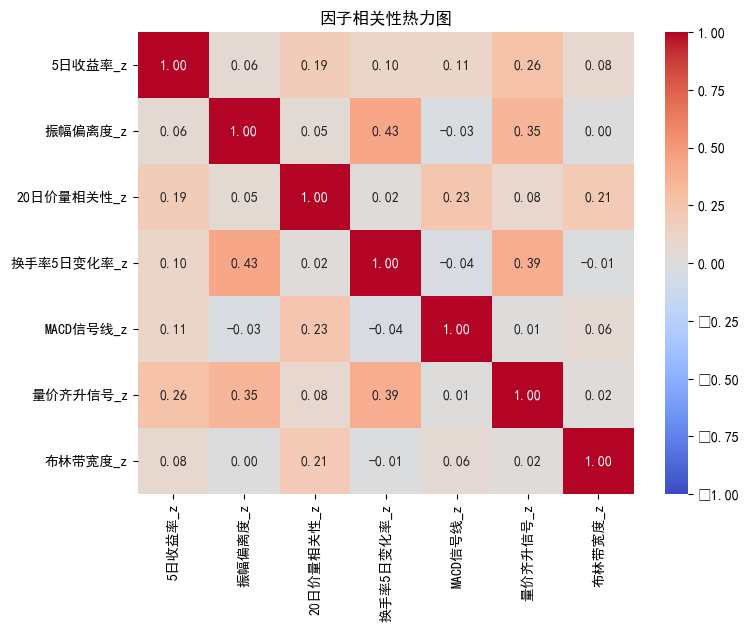

训练集绩效:
夏普比率: 1.00
IC均值: -0.0035, IR: -0.0079

测试集绩效:
夏普比率: 2.20
IC均值: 0.0073, IR: 0.0156


In [40]:
# 合并数据以计算因子（确保历史连续性）
full_df = pd.concat([train_df, test_df]).sort_values(["日期", "股票代码"])

# --------------------------
# 步骤1: 计算多因子
# --------------------------

# --------------------------
# 1.动量因子
# --------------------------
# 短期动量 (5日/20日收益率)
full_df["5日收益率"] = full_df.groupby("股票代码")["收盘"].transform(
    lambda x: x.pct_change(5)
)
full_df["20日收益率"] = full_df.groupby("股票代码")["收盘"].transform(
    lambda x: x.pct_change(20)
)

# 动量加速 (短期动量 - 长期动量)
full_df["动量差值"] = full_df["5日收益率"] - full_df["20日收益率"]

# 相对高低点 (收盘价 vs N日最高价)
full_df["5日最高价"] = full_df.groupby("股票代码")["最高"].transform(
    lambda x: x.rolling(5).max()
)
full_df["收盘价相对5日高点"] = full_df["收盘"] / full_df["5日最高价"] - 1

# ---------------------------
# 2.波动率因子
# ---------------------------
# 历史波动率 (20日标准差)
full_df["20日波动率"] = full_df.groupby("股票代码")["收盘"].transform(
    lambda x: x.rolling(20).std()
)

# 平均真实波幅 (ATR)
full_df["14日ATR"] = full_df.groupby("股票代码")["振幅"].transform(
    lambda x: x.rolling(14).mean()
)

# 振幅扩张 (当前振幅 vs 历史平均)
full_df["振幅偏离度"] = full_df["振幅"] / full_df.groupby("股票代码")["振幅"].transform(
    lambda x: x.rolling(20).mean()
) - 1

# --------------------------
# 3.成交量/流动性因子
# --------------------------
# 成交量变化率
full_df["成交量5日变化率"] = full_df.groupby("股票代码")["成交量"].transform(
    lambda x: x.pct_change(5)
)

# 量价相关性 (价格与成交量20日滚动相关系数)
full_df["20日价量相关性"] = full_df.groupby("股票代码").apply(
    lambda x: x["收盘"].rolling(20).corr(x["成交量"])
).reset_index(level=0, drop=True)

# 换手率动量
full_df["换手率5日变化率"] = full_df.groupby("股票代码")["换手率"].transform(
    lambda x: x.pct_change(5)
)

# ---------------------------
# 4.技术指标类因子
# ---------------------------
# RSI相对强弱指标 (14日)
def calculate_rsi(df, window=14):
    delta = df["涨跌额"]
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss.replace(0, 1e-6)  # 避免除零
    return 100 - (100 / (1 + rs))

full_df["14日RSI"] = full_df.groupby("股票代码").apply(
    lambda x: calculate_rsi(x)
).reset_index(level=0, drop=True)

# MACD指标 (12,26,9)
full_df["EMA12"] = full_df.groupby("股票代码")["收盘"].transform(
    lambda x: x.ewm(span=12).mean()
)
full_df["EMA26"] = full_df.groupby("股票代码")["收盘"].transform(
    lambda x: x.ewm(span=26).mean()
)
full_df["MACD"] = full_df["EMA12"] - full_df["EMA26"]
full_df["MACD信号线"] = full_df.groupby("股票代码")["MACD"].transform(
    lambda x: x.ewm(span=9).mean()
)

# ---------------------------
# 5.价量复合因子
# ---------------------------
# 量价齐升 (价格上涨伴随成交量放大)
full_df["量价齐升信号"] = (
    (full_df["涨跌幅"] > 0) & 
    (full_df["成交量"] > full_df.groupby("股票代码")["成交量"].transform(
        lambda x: x.rolling(5).mean()
    ))
).astype(int)

# 成交额动量 (资金流入速度)
full_df["成交额5日变化率"] = full_df.groupby("股票代码")["成交额"].transform(
    lambda x: x.pct_change(5)
)

# ---------------------------
# 6.均值回归类因子
# ---------------------------
# 收盘价偏离移动均线
full_df["20日均线"] = full_df.groupby("股票代码")["收盘"].transform(
    lambda x: x.rolling(20).mean()
)
full_df["收盘价偏离20日均线"] = full_df["收盘"] / full_df["20日均线"] - 1

# 布林带挤压 (波动率压缩)
full_df["布林带宽度"] = (
    full_df.groupby("股票代码")["收盘"].transform(
        lambda x: x.rolling(20).std()
    ) * 2
) / full_df["20日均线"]


# ---------------------------
# 因子选择
# ---------------------------
# factors = ["5日收益率", "20日收益率", "动量差值", "收盘价相对5日高点",
#            "20日波动率", "14日ATR", "振幅偏离度",
#            "成交量5日变化率", "20日价量相关性", "换手率5日变化率",
#            "14日RSI", "EMA12", "EMA26", "MACD", "MACD信号线",
#            "量价齐升信号", "成交额5日变化率",
#            "收盘价偏离20日均线", "布林带宽度",
#            ]
factors = ["5日收益率",
           "振幅偏离度",
           "20日价量相关性", "换手率5日变化率",
           "MACD信号线",
           "量价齐升信号",
           "布林带宽度",
           ]
factors_z = [i+"_z" for i in factors]

# 清理缺失值
full_df = full_df.dropna(subset=factors)

# --------------------------
# 步骤2: 因子标准化与合成
# --------------------------
for i in factors:
    full_df[i+"_z"] = full_df.groupby("日期")[i].transform(
        lambda x: (x - x.mean()) / x.std()
    )

# 合成综合因子
# full_df["综合因子"] = full_df["20日收益率_z"] + full_df["20日波动率_z"] + full_df["20日换手率均值_z"]
full_df["综合因子"] = full_df[factors_z].sum(axis=1)
full_df = full_df.dropna(subset=["综合因子"])

# 计算次日收益率
full_df["日收益率"] = full_df.groupby("股票代码")["收盘"].pct_change()
full_df["次日收益率"] = full_df.groupby("股票代码")["日收益率"].shift(-1)

# 分割训练集和测试集
train_data = full_df[full_df["日期"].isin(train_df["日期"])]
test_data = full_df[full_df["日期"].isin(test_df["日期"])]

# --------------------------
# 步骤3: 策略回测
# --------------------------
def backtest_strategy(data):
    """策略回测函数：每日选择综合因子前30%的股票，等权持有"""
    selected_stocks = data.groupby("日期").apply(
        lambda x: x.nlargest(int(len(x) * 0.3), "综合因子")
    )
    selected_stocks = selected_stocks.reset_index(drop=True)
    
    # 计算策略日收益率（次日收益率的均值）
    strategy_returns = selected_stocks.groupby("日期")["次日收益率"].mean().reset_index()
    strategy_returns.rename(columns={"次日收益率": "策略收益率"}, inplace=True)
    
    # 计算累计收益
    strategy_returns["累计收益"] = (1 + strategy_returns["策略收益率"]).cumprod()
    return strategy_returns

# 在训练集和测试集上回测
train_results = backtest_strategy(train_data)
test_results = backtest_strategy(test_data)

# --------------------------
# 步骤4: 计算绩效指标
# --------------------------
def calculate_metrics(returns):
    """计算夏普比率"""
    sharpe = (returns["策略收益率"].mean() / returns["策略收益率"].std()) * np.sqrt(252)
    return sharpe

sharpe_train = calculate_metrics(train_results)
sharpe_test = calculate_metrics(test_results)

def calculate_factor_ic_ir(data, factor_name):
    """计算单个因子的IC和IR"""
    ic_values = []
    for date in data["日期"].unique():
        daily_data = data[data["日期"] == date]
        valid_data = daily_data.dropna(subset=[factor_name, "次日收益率"])
        if len(valid_data) >= 2:
            ic, _ = spearmanr(valid_data[factor_name], valid_data["次日收益率"])
            ic_values.append(ic)
    ic_series = pd.Series(ic_values)
    mean_ic = ic_series.mean()
    ir = mean_ic / ic_series.std() if ic_series.std() != 0 else np.nan
    return mean_ic, ir

# 计算所有因子在训练集和测试集的IC/IR
def print_factor_metrics(factors, train_data, test_data):
    print("训练集因子绩效:")
    for factor in factors:
        mean_ic, ir = calculate_factor_ic_ir(train_data, factor)
        print(f"{factor}: IC={mean_ic:.4f}, IR={ir:.4f}")

    print("\n测试集因子绩效:")
    for factor in factors:
        mean_ic, ir = calculate_factor_ic_ir(test_data, factor)
        print(f"{factor}: IC={mean_ic:.4f}, IR={ir:.4f}")

# 调用函数输出结果
print_factor_metrics(factors, train_data, test_data)

# --------------------------
# 保留原综合因子的IC/IR计算（可选）
# --------------------------
def calculate_combined_ic_ir(data):
    """计算综合因子的IC和IR"""
    return calculate_factor_ic_ir(data, "综合因子")

mean_ic_train, ir_train = calculate_combined_ic_ir(train_data)
mean_ic_test, ir_test = calculate_combined_ic_ir(test_data)

print("\n综合因子绩效:")
print(f"训练集: IC={mean_ic_train:.4f}, IR={ir_train:.4f}")
print(f"测试集: IC={mean_ic_test:.4f}, IR={ir_test:.4f}")

# --------------------------
# 步骤5: 可视化
# --------------------------
# 绘制收益曲线
plt.figure(figsize=(12, 6))
plt.plot(train_results["日期"], train_results["累计收益"], label="训练集")
plt.plot(test_results["日期"], test_results["累计收益"], label="测试集")
plt.title("策略累计收益曲线")
plt.xlabel("日期")
plt.ylabel("累计收益")
plt.legend()
plt.grid(True)
plt.show()

# 因子相关性热力图
factor_corr = full_df[factors_z].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(factor_corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("因子相关性热力图")
plt.show()

# --------------------------
# 输出结果
# --------------------------
print("训练集绩效:")
print(f"夏普比率: {sharpe_train:.2f}")
print(f"IC均值: {mean_ic_train:.4f}, IR: {ir_train:.4f}\n")

print("测试集绩效:")
print(f"夏普比率: {sharpe_test:.2f}")
print(f"IC均值: {mean_ic_test:.4f}, IR: {ir_test:.4f}")